In [1]:
#libraries
import numpy as np 
import pandas as pd

import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

# visulization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

 # Part C

neural network using sklearn

In [2]:
class NeuralNetwork:
    def __init__(self, learning_rate, train,hidden_layers):
        self.train=train
        self.clf=MLPClassifier(solver='lbfgs', alpha=learning_rate,hidden_layer_sizes=hidden_layers, random_state=1)

    def fit(self):
        train_x=self.train[["x","y"]]
        train_y=self.train[["value"]]
        self.clf.fit(train_x,train_y)

    def predict(self, test):
        test_x=test[["x","y"]]
        predicted=self.clf.predict(test_x)
        test['pred']=predicted
        return predicted

    def score(self, test, predicted):
        i=0
        count=0
        for index, row in test.iterrows():
            if row["value"]==predicted[i]:
                count +=1
            i+=1
        return round(count/i, 4)
    
    def lookin(self,data):
        listx=[]
        listy=[]
        for index, row in data.iterrows():
            listx.append(row["x"])
            listy.append(row["y"])
        l=[listx,listy]
        for i in range(len(self.clf.coefs_)):
            print(self.clf.coefs_[i] ,"\n")
            print(self.clf.intercepts_[i],"\n")
            print(i)
            datac=data.copy()
            l=(self.lookinlayer(datac,l,self.clf.coefs_[i],self.clf.intercepts_[i]))


    def lookinlayer(self,data,lastlayers,weight,bias):
        count = 0
        rlist=[]
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for k in range(len(bias)):
            pred1 = []
            predictionlist=[]
            for j in range(len(data)):
                prediction = bias[k]
                for i in range(len(lastlayers)):
                    prediction += (lastlayers[i][j] * weight[i][k])
                predictionlist.append(prediction)
                if prediction > 0:
                    prediction = 1
                else:
                    prediction = -1
                pred1.append(prediction)
        # now add the prediction list to the data set in order to make comparison
            rlist.append(predictionlist)
            data['pred']=pred1
            plotting_test(data)    
        return rlist  
    
    def lookinlayer1(self,data,lastlayers,weight,bias):
        count = 0
        rlist=[]
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for k in range(len(bias)):
            pred1 = []
            predictionlist=[]
            for j in range(len(data)):
                prediction=0
                for i in range(len(lastlayers)):
                    prediction =prediction+ bias[k] + (lastlayers[i][j] * weight[i][k])
                predictionlist.append(prediction)
                if prediction > 0:
                    prediction = 1
                else:
                    prediction = -1
                pred1.append(prediction)
        # now add the prediction list to the data set in order to make comparison
            rlist.append(predictionlist)
            data['pred']=pred1
#             plotting_test(data)    
        return rlist

    def getLastHiddenLayerInfo(self):
            listx=[]
            listy=[]
            val=[]        

            for index, row in self.train.iterrows():
                listx.append(row["x"])
                listy.append(row["y"])
                val.append(row["value"])
            l=[listx,listy]
            for i in range(len(self.clf.coefs_)-1):
                print(self.clf.coefs_[i] ,"\n")
                print(self.clf.intercepts_[i],"\n")
                print(i)
                data=self.train.copy()
                l=(self.lookinlayer1(data,l,self.clf.coefs_[i],self.clf.intercepts_[i]))
            l.append(val)
            return l


In [3]:
# this function builds the data set for part A of the assighnment
def build_data_partA(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if y > 1 then the value is 1
        if y[i] > 1:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df

In [4]:
# this function builds the data set for part B of the assighnment
def build_data_partB(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(700):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)
    for i in range(700,1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-300, 300)
        randY = random.randint(-300, 300)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


In [5]:
# this function plots the values of the actual values of the data compared to the prediction values we predicted
def plotting_test(test):
    f, ax = plt.subplots(1, 2)
    ax[0].set_title("value")
    ax[1].set_title("predict")

    for index, row in test.iterrows():
        if row['value'] == 1:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
       
        if row['pred'] == 1:
#             if row['value']==1:
             ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
#             else:
#                 ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="yellow")
        else:
#             if row['value']==-1:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
#             else:
#                 ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="purple")
    plt.show()

def plotting_train(train):
    for index, row in train.iterrows():
        if row['value'] == 1:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()

In [6]:
# this function plots the confussion matrix
def confussion_matrix (cf_matrix):
    group_names = ['true pos', 'false pos', 'false neg', 'true neg']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Part C main

plotting train


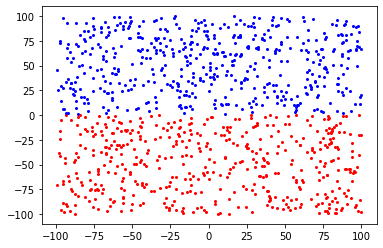

[[ 0.01335635 -0.32634781 -0.00577474 -0.05998996]
 [-2.17323312 -0.20088031  0.09650511  0.07517583]] 

[ 4.48659746  0.80238966  0.11121718 -0.61267021] 

0


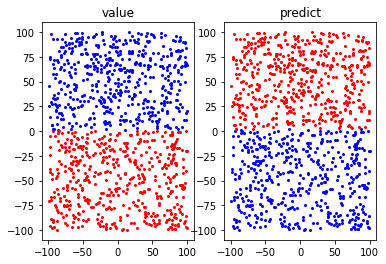

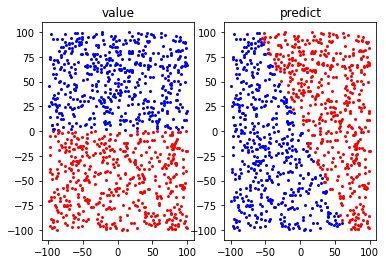

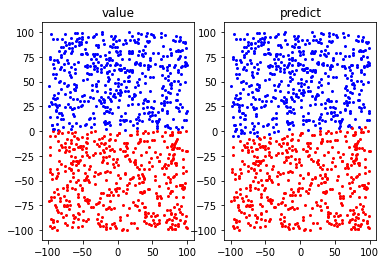

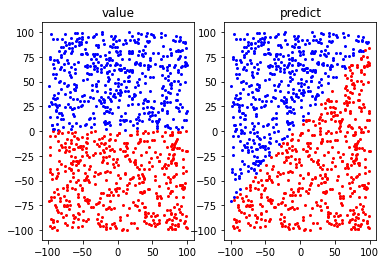

[[ 0.06743287  1.83723661]
 [ 0.10769294  0.13411657]
 [ 0.03683346 -0.20242234]
 [ 0.08126971 -0.4242616 ]] 

[-0.31374103 -0.05752173] 

1


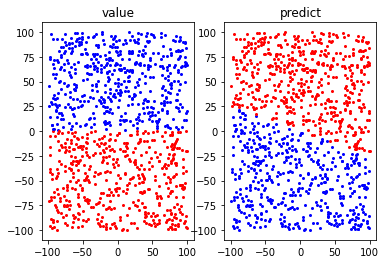

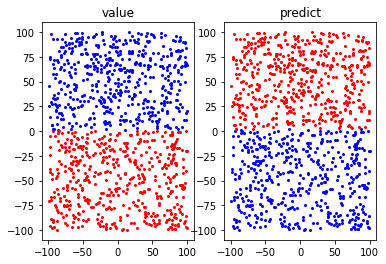

[[-0.24705699]
 [-2.31904818]] 

[12.14604605] 

2


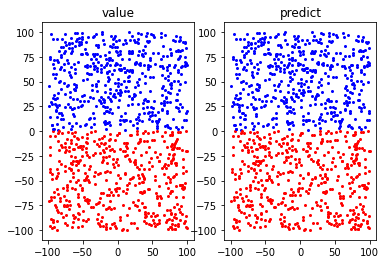

first test
0.999
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       510
           1       1.00      1.00      1.00       490

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



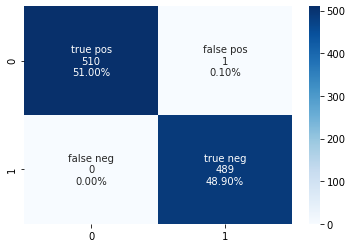

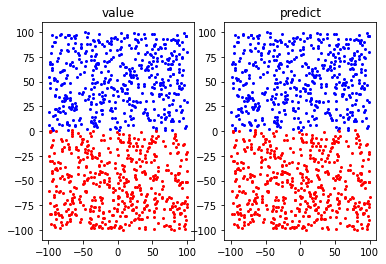

second test
1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       514

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



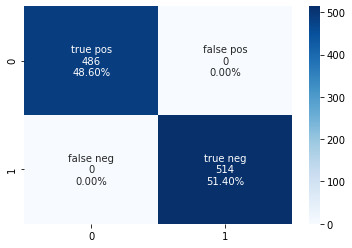

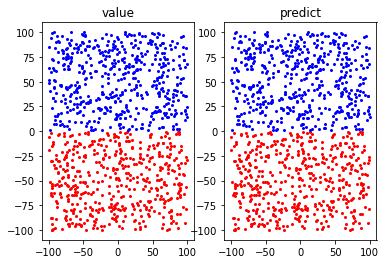

In [7]:
train = build_data_partA(1)
net1=NeuralNetwork(0.1,train,(4,2))
net1.fit()
print("plotting train")
plotting_train(train)
net1.lookin(train)

print("first test")
first_test = build_data_partA(9)
test_y=first_test[["value"]]
pred1=net1.predict(first_test)
print(net1.score(first_test,pred1))
con_mat1 = confusion_matrix(pred1,test_y)
confussion_matrix(con_mat1)
print(classification_report(test_y, pred1))
plotting_test(first_test)



print("second test")
second_test = build_data_partA(8)
test_y=second_test[["value"]]
pred2=net1.predict(second_test)
print(net1.score(second_test,pred2))
con_mat2 = confusion_matrix(pred2,test_y)
confussion_matrix(con_mat2)
print(classification_report(test_y, pred2))
plotting_test(second_test)

[[ 0.01335635 -0.32634781 -0.00577474 -0.05998996]
 [-2.17323312 -0.20088031  0.09650511  0.07517583]] 

[ 4.48659746  0.80238966  0.11121718 -0.61267021] 

0


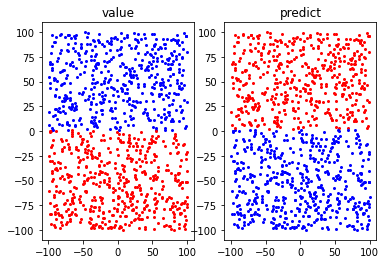

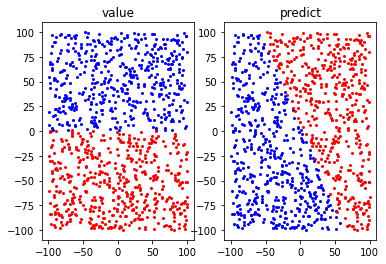

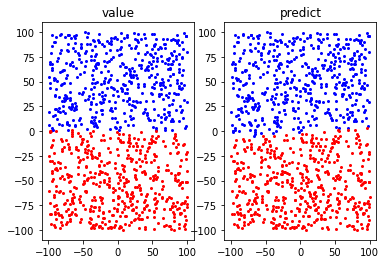

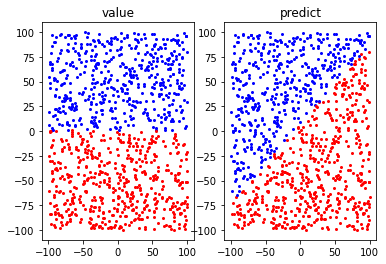

[[ 0.06743287  1.83723661]
 [ 0.10769294  0.13411657]
 [ 0.03683346 -0.20242234]
 [ 0.08126971 -0.4242616 ]] 

[-0.31374103 -0.05752173] 

1


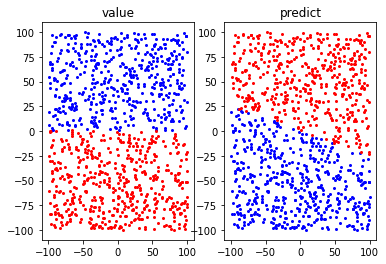

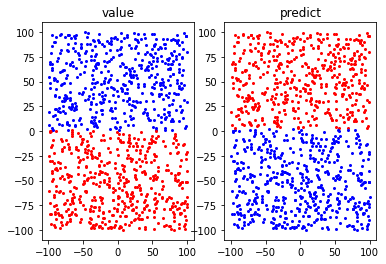

[[-0.24705699]
 [-2.31904818]] 

[12.14604605] 

2


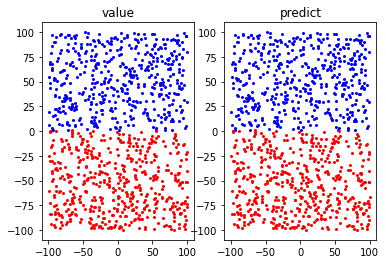

In [8]:
net1.lookin(first_test)

[[ 0.01335635 -0.32634781 -0.00577474 -0.05998996]
 [-2.17323312 -0.20088031  0.09650511  0.07517583]] 

[ 4.48659746  0.80238966  0.11121718 -0.61267021] 

0


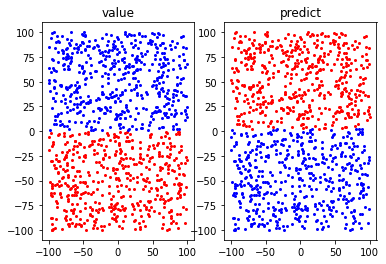

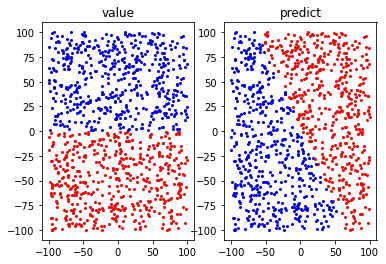

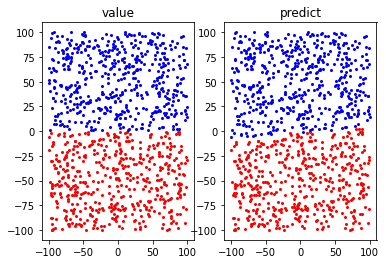

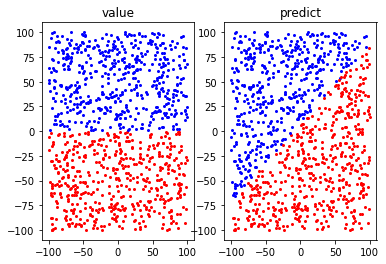

[[ 0.06743287  1.83723661]
 [ 0.10769294  0.13411657]
 [ 0.03683346 -0.20242234]
 [ 0.08126971 -0.4242616 ]] 

[-0.31374103 -0.05752173] 

1


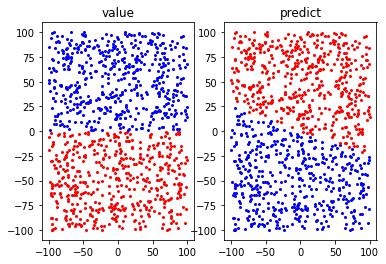

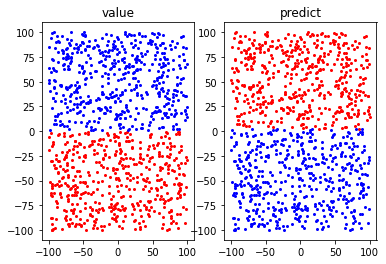

[[-0.24705699]
 [-2.31904818]] 

[12.14604605] 

2


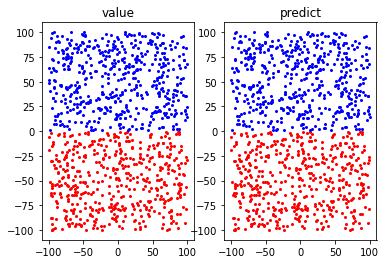

In [9]:
net1.lookin(second_test)

part b:

plotting train


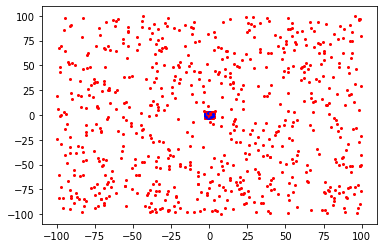

[[-0.18247559 -0.26738133 -0.2563676   0.00678619]
 [ 0.41385679 -0.50199371  0.34775283 -0.8269559 ]] 

[-0.49638902  1.67650393 -0.43667909  1.67420724] 

0


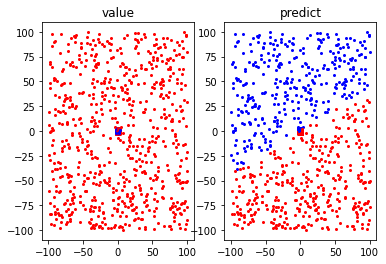

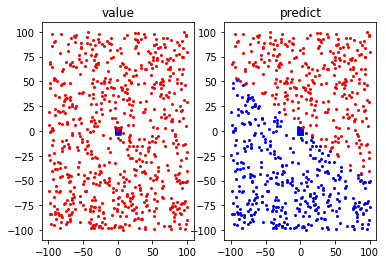

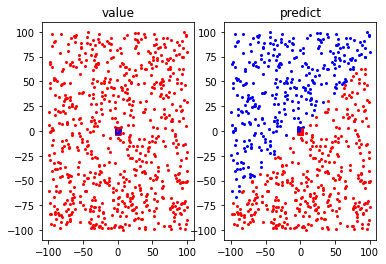

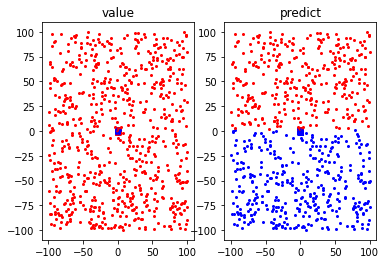

[[-0.0213117   0.34042965]
 [-0.03497966 -0.63699749]
 [ 0.00378284  0.42023419]
 [-0.0259314  -1.73321374]] 

[-2.54072649  4.41133609] 

1


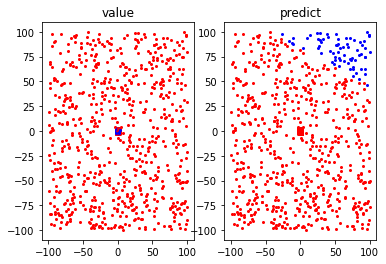

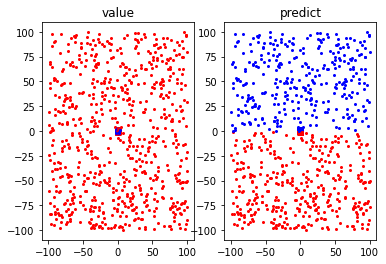

[[0.13810493]
 [2.40339171]] 

[-1.16253188] 

2


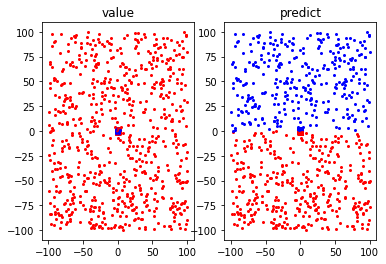

[[2.50226514]] 

[-12.2002102] 

3


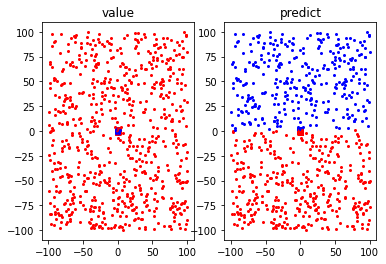

first test
0.506
              precision    recall  f1-score   support

          -1       0.84      0.53      0.65       870
           1       0.10      0.33      0.15       130

    accuracy                           0.51      1000
   macro avg       0.47      0.43      0.40      1000
weighted avg       0.74      0.51      0.59      1000



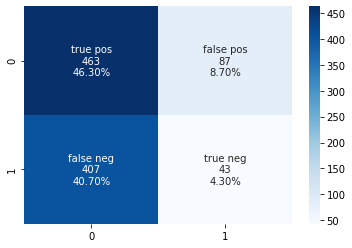

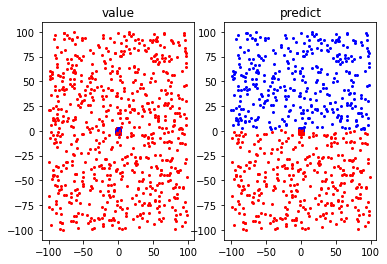

second test
0.546
              precision    recall  f1-score   support

          -1       0.87      0.56      0.68       867
           1       0.14      0.46      0.21       133

    accuracy                           0.55      1000
   macro avg       0.50      0.51      0.45      1000
weighted avg       0.77      0.55      0.62      1000



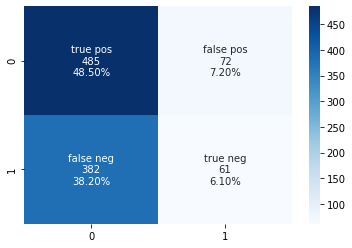

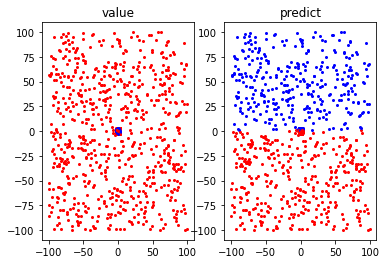

In [10]:
trainb = build_data_partB(9)
net2=NeuralNetwork(0.1,train,(4,2,1))
net2.fit()
print("plotting train")
plotting_train(trainb)
net2.lookin(trainb)

print("first test")
first_testb = build_data_partB(3)
test_yb=first_testb[["value"]]
pred1=net2.predict(first_testb)
print(net2.score(first_testb,pred1))
con_mat1 = confusion_matrix(pred1,test_yb)
confussion_matrix(con_mat1)
print(classification_report(test_yb, pred1))
plotting_test(first_testb)



print("second test")
second_testb = build_data_partB(7)
test_yb=second_testb[["value"]]
pred2=net2.predict(second_testb)
print(net2.score(second_testb,pred2))
con_mat2 = confusion_matrix(pred2,test_yb)
confussion_matrix(con_mat2)
print(classification_report(test_yb, pred2))
plotting_test(second_testb)

[[-0.18247559 -0.26738133 -0.2563676   0.00678619]
 [ 0.41385679 -0.50199371  0.34775283 -0.8269559 ]] 

[-0.49638902  1.67650393 -0.43667909  1.67420724] 

0


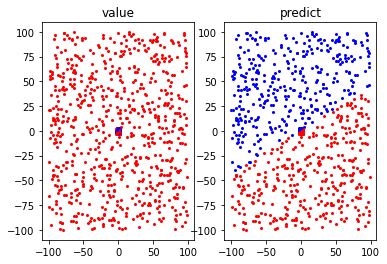

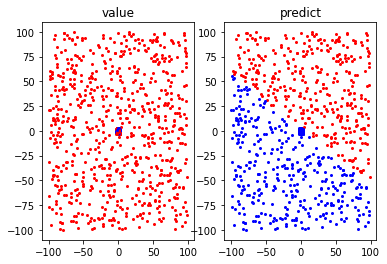

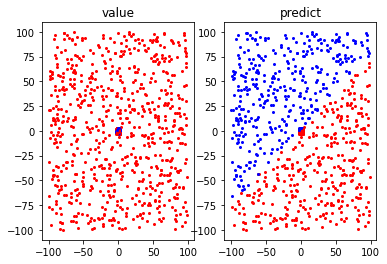

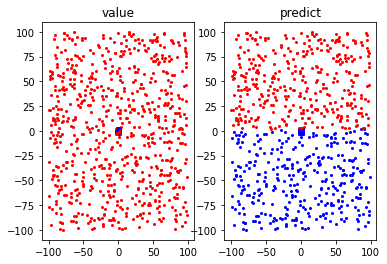

[[-0.0213117   0.34042965]
 [-0.03497966 -0.63699749]
 [ 0.00378284  0.42023419]
 [-0.0259314  -1.73321374]] 

[-2.54072649  4.41133609] 

1


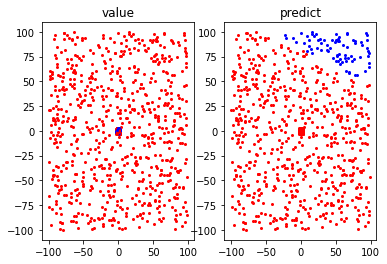

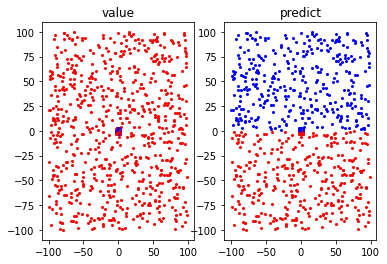

[[0.13810493]
 [2.40339171]] 

[-1.16253188] 

2


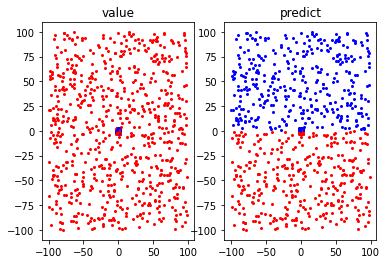

[[2.50226514]] 

[-12.2002102] 

3


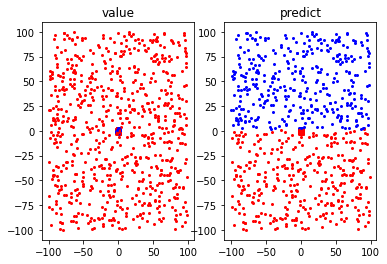

In [11]:
net2.lookin(first_testb)

[[-0.18247559 -0.26738133 -0.2563676   0.00678619]
 [ 0.41385679 -0.50199371  0.34775283 -0.8269559 ]] 

[-0.49638902  1.67650393 -0.43667909  1.67420724] 

0


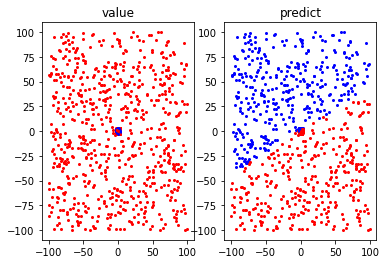

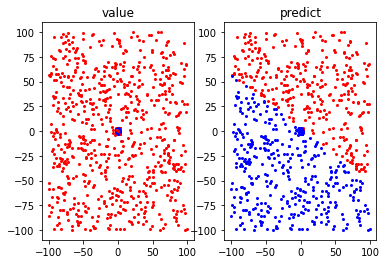

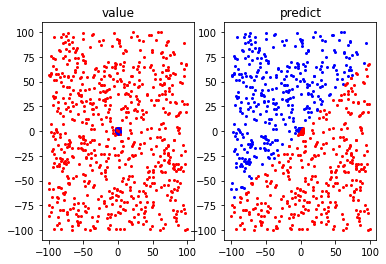

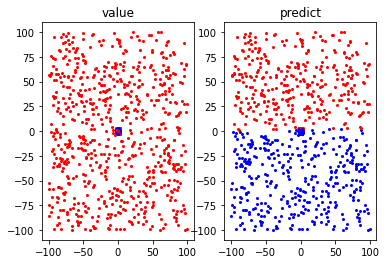

[[-0.0213117   0.34042965]
 [-0.03497966 -0.63699749]
 [ 0.00378284  0.42023419]
 [-0.0259314  -1.73321374]] 

[-2.54072649  4.41133609] 

1


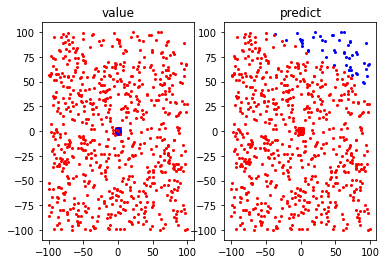

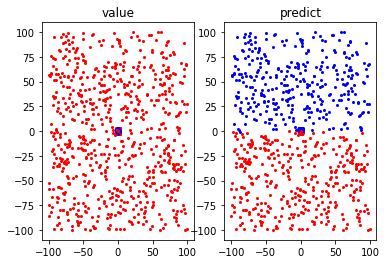

[[0.13810493]
 [2.40339171]] 

[-1.16253188] 

2


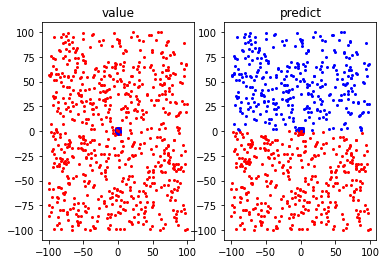

[[2.50226514]] 

[-12.2002102] 

3


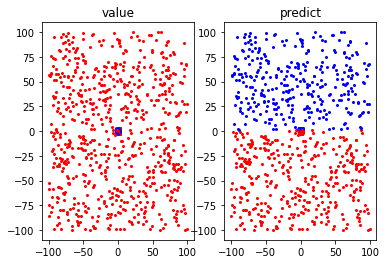

In [12]:
net2.lookin(second_testb)

# part D

In [13]:
listA=net1.getLastHiddenLayerInfo()


[[ 0.01335635 -0.32634781 -0.00577474 -0.05998996]
 [-2.17323312 -0.20088031  0.09650511  0.07517583]] 

[ 4.48659746  0.80238966  0.11121718 -0.61267021] 

0
[[ 0.06743287  1.83723661]
 [ 0.10769294  0.13411657]
 [ 0.03683346 -0.20242234]
 [ 0.08126971 -0.4242616 ]] 

[-0.31374103 -0.05752173] 

1


In [14]:
print(len(listA))
df=pd.DataFrame()
for i in range(len(listA)):
    if(i<len(listA)-1):
        df[i]=listA[i]
    else:
        df["value"]=listA[i]
df.head(20)

3


,0,1,value
0,-12.079865,-335.659917,1.0
1,5.154669,83.207263,-1.0
2,-8.036515,-237.300930,1.0
3,-11.105294,-205.557487,1.0
4,3.419534,144.185580,-1.0
5,-7.333452,-227.262805,1.0
6,-1.395839,-96.616591,1.0
7,-17.912036,-385.948330,1.0
8,-3.944558,-170.815059,1.0
9,3.901519,118.792472,-1.0


In [15]:
class Adaline:
    def __init__(self, learning_rate, train, num):
        self.learning_rate = learning_rate
        self.train = train
        self.num=num # number of neurons in last layer

    # this function generates random small weights and bias for the Adaline algorithm
    def _weight_genarate(self,num):
        weight = [] 
        for i in range(num):
            random.seed(i)
            rand = random.uniform(0, 0.01)
            rand = round(rand, 4)
            weight.append(rand)
        
        # now generate the bias 
        random.seed(4)
        bias = random.uniform(0, 1)
        bias = round(bias, 4)
        return weight, bias

    # this function fits the adaline model on the training data 
    def fit(self):
        ERR = []
        mse = []
        EPS = 0.001
        # generate weights and bias
        weight, bias = self._weight_genarate(self.num)
        oldmse=1
        while(True):
            ERR = []
            # for each row we fix the bias and wights in order to get the minimum error
            for index, row in self.train.iterrows():
                predicted=bias
                for i in range(self.num):
#                     print("adding")
                    predicted += row[i]/100 * weight[i]
                    
                
                for k in range(len(weight)):
                    # print(k)
                    weight[k]=round((weight[k]+self.learning_rate*row["value"]-predicted*row[k]/100),3)

                bias= round((bias+self.learning_rate*row["value"]-predicted),3)

                # error calculation
                error = (row["value"] - predicted) ** 2
                # if the error is small enough return
                ERR.append(error)
               
            mse.append(np.sum(ERR))
            print(mse[-1])
            if len(mse) >= 2:
                # checking if the error is smaller then eps or if it hasnt changed
                if abs(mse[-1] - mse[-2]) < EPS or abs(mse[-1] - mse[-2])==oldmse :
                    break
            # updating the old mse
            if len(mse)>=2:
                oldmse=abs(mse[-1] - mse[-2])        
        return weight, bias

    
    
    
    
    
    
    
    
    
    # this function predicts on a test data and returns the number of correct predictions
#     def predict(self, test, weight, bias):
#         count = 0
#         pred = []
#         # for each row we use the activation formula with the weights and bias we returned
#         # in the fit function to predict on the test data set
#         for index, row in test.iterrows():
#             prediction = bias + (row['x'] * weight[0]) + (row['y'] * weight[1])
#             if prediction > 0:
#                 prediction = 1
#             else:
#                 prediction = -1
#             pred.append(prediction)

#             if prediction == row['value']:
#                 count += 1
#         # now add the prediction list to the data set in order to make comparison 
#         test['predict'] = pred
#         return count

#     # this function caculates the acuuracy of the predictions
#     def score(self, pred, test):
#         acurr = pred / len(test)
#         res = round(acurr, 4)
#         return res

In [16]:
ada = Adaline(0.1, df, 1)
weight, bias = ada.fit()

1063.5860492904364
1081.9267304863129
1081.9267304863129
